## <center>IMAGE DATA

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [4]:
os.chdir(r"D:\Imarticus\Time Series And Deep Learning\Neural Network\Datashared by sir")
mnist=pd.read_csv("MNIST_Train .csv")
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Note:-Maximum pixel value can be 255

In [5]:
## plotting 

In [6]:
abcd=mnist.iloc[9,1:] # 1st row and all the columns (pixels for the 1st row)

In [7]:
abcd

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 9, Length: 784, dtype: int64

In [8]:
abcd=np.array(abcd)

In [9]:
abcd=abcd.reshape(28,28)

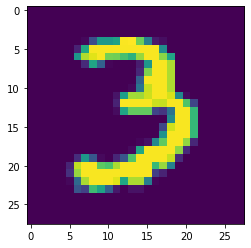

In [10]:
plt.imshow(abcd)

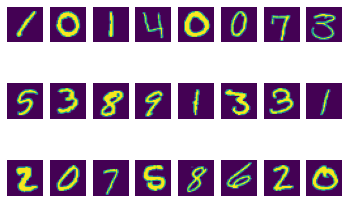

In [11]:
mnist1 = mnist.iloc[:,1:786]
mnist1=np.array(mnist1)
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis('off')

## Neural Network 

In [12]:
mnist=pd.read_csv("MNIST_Train .csv")
mnist.shape

(42000, 785)

In [13]:
mnist_x=mnist.iloc[:,1:786] # Taking all columns except labels

mnist_y=mnist.iloc[:,0] # Taking Label column here

In [14]:
from sklearn.model_selection import train_test_split
mnist_x_train,mnist_x_test,mnist_y_train,mnist_y_test= train_test_split(mnist_x,mnist_y,test_size=.2)

In [15]:
mnist_x_train.shape,mnist_x_test.shape,mnist_y_train.shape,mnist_y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [16]:
mnist_x_train=tf.keras.utils.normalize(mnist_x_train)
mnist_x_test=tf.keras.utils.normalize(mnist_x_test)

#### Note:- It is not compulsory or mandatory to normalize but advisable

In [17]:
model=tf.keras.models.Sequential()  # Initialize the model
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## 1st layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## 2nd layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ## 3rd layers
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) ## last layers
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
mnist_y_train=np.array(mnist_y_train)

In [19]:
model1=model.fit(mnist_x_train,mnist_y_train,epochs=40,validation_split=.2,batch_size=100)

Epoch 1/40
269/269 [==============================] - 2s 4ms/step - loss: 0.6139 - accuracy: 0.8201 - val_loss: 0.2819 - val_accuracy: 0.9156
Epoch 2/40
269/269 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9267 - val_loss: 0.2225 - val_accuracy: 0.9320
Epoch 3/40
269/269 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.9467 - val_loss: 0.1724 - val_accuracy: 0.9482
Epoch 4/40
269/269 [==============================] - 1s 3ms/step - loss: 0.1369 - accuracy: 0.9585 - val_loss: 0.1555 - val_accuracy: 0.9545
Epoch 5/40
269/269 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9660 - val_loss: 0.1404 - val_accuracy: 0.9583
Epoch 6/40
269/269 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9718 - val_loss: 0.1341 - val_accuracy: 0.9598
Epoch 7/40
269/269 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9756 - val_loss: 0.1349 - val_accuracy: 0.9592
Epoch 

In [20]:
model1.history

{'loss': [0.6138761043548584,
  0.2417708784341812,
  0.17723526060581207,
  0.13687580823898315,
  0.11107441037893295,
  0.09133288264274597,
  0.07496604323387146,
  0.06259212642908096,
  0.051386650651693344,
  0.040655702352523804,
  0.034360166639089584,
  0.027157925069332123,
  0.02322450652718544,
  0.01834077201783657,
  0.01497808936983347,
  0.012663026340305805,
  0.013385548256337643,
  0.007787717971950769,
  0.009754215367138386,
  0.010603909380733967,
  0.011072024703025818,
  0.00808971468359232,
  0.007059954106807709,
  0.009910505264997482,
  0.009563607163727283,
  0.0036467076279222965,
  0.0022284542210400105,
  0.000559670093934983,
  0.00021817779634147882,
  0.00015612086281180382,
  0.00011100092524429783,
  9.61864207056351e-05,
  8.586805779486895e-05,
  7.254525553435087e-05,
  6.599454354727641e-05,
  5.7816345361061394e-05,
  5.149188655195758e-05,
  4.644639921025373e-05,
  3.938421650673263e-05,
  3.519052188494243e-05],
 'accuracy': [0.820052087306

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

predict_x=model.predict(mnist_x_test) # Prediction in probability
predict_x

array([[1.05183265e-10, 1.88456427e-17, 9.99988675e-01, ...,
        1.12017497e-05, 2.72126523e-11, 7.34730676e-14],
       [1.23993080e-26, 4.11871218e-19, 1.20788545e-19, ...,
        5.23403832e-20, 1.00000000e+00, 6.10928799e-12],
       [1.03000944e-22, 3.28765661e-13, 3.14410943e-15, ...,
        5.11447468e-18, 1.00000000e+00, 1.46892732e-16],
       ...,
       [3.47302010e-32, 6.60541174e-16, 4.70179866e-26, ...,
        2.42987441e-24, 7.49422260e-17, 6.30179195e-18],
       [3.26539231e-14, 1.94640396e-17, 1.96680303e-05, ...,
        9.99980330e-01, 4.11981374e-17, 1.13148048e-15],
       [3.95568622e-16, 5.62149580e-06, 1.27342408e-14, ...,
        1.12698513e-06, 1.15388774e-08, 1.59863815e-01]], dtype=float32)

In [22]:
Model1=pd.DataFrame(model1.history)
Model1

,loss,accuracy,val_loss,val_accuracy
0,0.613876,0.820052,0.281861,0.915625
1,0.241771,0.926749,0.222544,0.931994
2,0.177235,0.946726,0.172440,0.948214
3,0.136876,0.958519,0.155512,0.954464
4,0.111074,0.966034,0.140360,0.958333
5,0.091333,0.971763,0.134121,0.959821
6,0.074966,0.975632,0.134944,0.959226
7,0.062592,0.980469,0.124331,0.965179
8,0.051387,0.984338,0.120260,0.968006
9,0.040656,0.987574,0.124296,0.966369


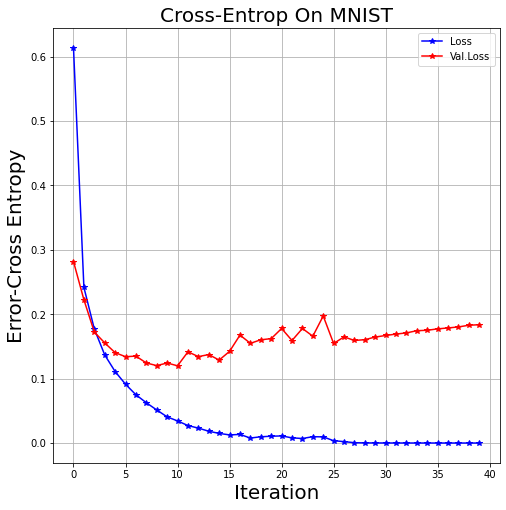

In [27]:
plt.figure(figsize=(8,8))
plt.plot(Model1.loss,marker="*",color="blue",label='Loss')
plt.plot(Model1.val_loss,marker="*",color="red",label='Val.Loss')
plt.xlabel("Iteration",size=20)
plt.ylabel("Error-Cross Entropy",size=20)
plt.title("Cross-Entrop On MNIST",size=20)
plt.legend()
plt.grid()
plt.show()

#### Fetch the position of the higest probability and use that for confusion matrix using argmax

In [24]:
classes_x=np.argmax(predict_x,axis=1) 
tab=confusion_matrix(classes_x,mnist_y_test)
tab

array([[821,   0,   3,   0,   0,   2,   2,   0,   2,   1],
       [  0, 938,   1,   3,   1,   5,   1,   2,   9,   0],
       [  2,   4, 834,   7,   1,   1,   0,   5,   4,   0],
       [  0,   1,   3, 846,   0,  11,   0,   1,   4,   2],
       [  1,   2,   2,   0, 777,   2,   0,   5,   1,   8],
       [  0,   1,   0,   7,   0, 731,   5,   0,   8,   3],
       [  1,   1,   3,   0,   5,   4, 801,   0,   2,   0],
       [  0,   1,   2,   3,   1,   1,   1, 853,   1,   4],
       [  3,   3,   2,   5,   1,   3,   3,   2, 783,   3],
       [  1,   0,   2,   4,  12,   5,   0,   7,   3, 804]], dtype=int64)

In [25]:
tab.diagonal().sum()/tab.sum()  # Accuracy  

0.9747619047619047